# Настройка pandas

In [2]:
# импортируем numpy и pandas
import numpy as np
import pandas as pd

In [3]:
# считываем данные в DataFrame, используя в качестве
# индекса столбец Symbol и записывая только те 
# столбцы, которые имеют позиции 0, 2, 3, 7
sp500 = pd.read_csv("Data/sp500.csv", 
                    index_col='Symbol', 
                    usecols=[0, 2, 3, 7])

# считываем исторические данные о котировках акций
omh = pd.read_csv("Data/omh.csv")

# Выполнение арифметических операций с объектами DataFrame или Series

In [4]:
# задаем стартовое значение генератора случайных чисел
# для получения воспроизводимых результатов
np.random.seed(123456)
# создаем объект DataFrame
df = pd.DataFrame(np.random.randn(5, 4), 
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.469112,-0.282863,-1.509059,-1.135632
1,1.212112,-0.173215,0.119209,-1.044236
2,-0.861849,-2.104569,-0.494929,1.071804
3,0.721555,-0.706771,-1.039575,0.271860
4,-0.424972,0.567020,0.276232,-1.087401


In [5]:
# умножаем все на 2
df * 2

,A,B,C,D
0,0.938225,-0.565727,-3.018117,-2.271265
1,2.424224,-0.346429,0.238417,-2.088472
2,-1.723698,-4.209138,-0.989859,2.143608
3,1.443110,-1.413542,-2.079150,0.543720
4,-0.849945,1.134041,0.552464,-2.174801


In [6]:
# извлекаем первую строку 
s = df.iloc[0] 
# вычитаем первую строку из каждой строки объекта DataFrame
diff = df - s 
diff

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.743000,0.109649,1.628267,0.091396
2,-1.330961,-1.821706,1.014129,2.207436
3,0.252443,-0.423908,0.469484,1.407492
4,-0.894085,0.849884,1.785291,0.048232


In [7]:
# вычитаем объект DataFrame из объекта Series
diff2 = s - df
diff2

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.743000,-0.109649,-1.628267,-0.091396
2,1.330961,1.821706,-1.014129,-2.207436
3,-0.252443,0.423908,-0.469484,-1.407492
4,0.894085,-0.849884,-1.785291,-0.048232


In [8]:
# B, C
s2 = s[1:3]
# добавляем E
s2['E'] = 0
# смотрим, как применяется выравнивание
# в этой математической операции
df + s2

,A,B,C,D,E
0,NaN,-0.565727,-3.018117,NaN,NaN
1,NaN,-0.456078,-1.389850,NaN,NaN
2,NaN,-2.387433,-2.003988,NaN,NaN
3,NaN,-0.989634,-2.548633,NaN,NaN
4,NaN,0.284157,-1.232826,NaN,NaN


In [9]:
# извлекаем строки в позициях с 1-й по 3-ю и только столбцы B и C
subframe = df[1:4][['B', 'C']]
# мы извлекаем небольшой квадрат из середины df
subframe

,B,C
1,-0.173215,0.119209
2,-2.104569,-0.494929
3,-0.706771,-1.039575


In [10]:
# демонстрируем, как происходит выравнивание при
# выполнении операции вычитания
df - subframe

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN
2,NaN,0.0,0.0,NaN
3,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN


In [11]:
# извлекаем столбец A
a_col = df['A']
df.sub(a_col, axis=0)

,A,B,C,D
0,0.0,-0.751976,-1.978171,-1.604745
1,0.0,-1.385327,-1.092903,-2.256348
2,0.0,-1.242720,0.366920,1.933653
3,0.0,-1.428326,-1.761130,-0.449695
4,0.0,0.991993,0.701204,-0.662428


# Количество значений

In [12]:
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
# подсчитываем встречаемость каждого уникального значения
s.count()

4

# Определение уникальных значений (и их встречаемости)

In [13]:
# возвращает список уникальных элементов
s.unique()

array(['a', 'b', 'c', nan], dtype=object)

In [14]:
s.nunique()

3

In [15]:
s.nunique(dropna=False)

4

In [16]:
# получаем сводную статистику для нечисловых данных
s.value_counts(dropna=False)

a      2
b      1
c      1
NaN    1
dtype: int64

# Вычисление минимума и максимума

In [17]:
# определяем минимальную цену для обеих акций
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

In [18]:
# определяем максимальную цену для обеих акций
omh[['MSFT', 'AAPL']].max()

MSFT     48.84
AAPL    115.93
dtype: float64

In [19]:
# определяем минимальную цену для обеих акций
omh[['MSFT', 'AAPL']].idxmin()

MSFT    11
AAPL    11
dtype: int64

In [20]:
# определяем максимальную цену для обеих акций
omh[['MSFT', 'AAPL']].idxmax()

MSFT    3
AAPL    2
dtype: int64

# Вычисление n наименьших значений и n наибольших значений

In [21]:
# вычисляем 4 наименьших значения
omh.nsmallest(4, ['MSFT'])['MSFT']

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

In [22]:
# вычисляем 4 наибольших значения
omh.nlargest(4, ['MSFT'])['MSFT']

3     48.84
0     48.62
1     48.46
16    48.45
Name: MSFT, dtype: float64

In [23]:
# вычисляем 4 наименьших значения в серии
omh.MSFT.nsmallest(4)

11    45.16
12    45.74
21    46.45
10    46.67
Name: MSFT, dtype: float64

# Вычисление накопленных значений

In [24]:
# вычисляем накопленное произведение
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

In [25]:
# вычисляем накопленную сумму
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

# Получение сводки статистик

In [26]:
# получаем сводку статистик для датафрейма
omh.describe()

,MSFT,AAPL
count,22.000000,22.000000
mean,47.493182,112.411364
std,0.933077,2.388772
min,45.160000,106.750000
25%,46.967500,111.660000
50%,47.625000,112.530000
75%,48.125000,114.087500
max,48.840000,115.930000


In [27]:
# вычисляем сводку статистик для MSFT
omh.MSFT.describe()

count    22.000000
mean     47.493182
std       0.933077
min      45.160000
25%      46.967500
50%      47.625000
75%      48.125000
max      48.840000
Name: MSFT, dtype: float64

In [28]:
# вычисляем для MSFT только среднее значение
omh.MSFT.describe()['mean']

47.49318181818182

In [29]:
# получаем сводку статистик для нечисловых данных
s = pd.Series(['a', 'a', 'b', 'c', np.NaN])
s.describe()

count     4
unique    3
top       a
freq      2
dtype: object

# Среднее значение

In [30]:
# вычисляем среднее значение для всех столбцов в датафрейме omh
omh.mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

In [31]:
# вычисляем значение, усредненное по всем столбцам,
# для каждой строки
omh.mean(axis=1)[:5]

0    81.845
1    81.545
2    82.005
3    82.165
4    81.710
dtype: float64

# Медиана

In [32]:
# вычисляем медиану значений для каждого столбца
omh.median()

MSFT     47.625
AAPL    112.530
dtype: float64

# Мода

In [33]:
# вычисляем моду для этой серии
s = pd.Series([1, 2, 3, 3, 5])
s.mode()

0    3
dtype: int64

In [34]:
# может быть несколько мод
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

# Дисперсия

In [35]:
# вычисляем дисперсию значений в каждом столбце
omh.var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

# Стандартное отклонение

In [36]:
# вычисляем стандартное отклонение
omh.std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

# Ковариация

In [37]:
# вычисляем ковариацию между MSFT и AAPL
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

# Корреляция

In [38]:
# вычисляем корреляцию между MSFT и AAPL
omh.MSFT.corr(omh.AAPL)

0.8641560684381169

# Дискретизация и квантилизация

In [39]:
# генерируем 10000 случайных чисел
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

In [40]:
# выводим среднее и стандартное отклонение
(dist.mean(), dist.std())

(-0.002863324040906651, 1.008716203199891)

In [41]:
# разбиваем на пять одинаковых по размеру групп
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [42]:
# смотрим категории
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]],
              closed='right',
              dtype='interval[float64]')

In [43]:
# свойство .codes показывает, в какой группе находится
# каждый элемент
bins.codes

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [44]:
# закрываем интервалы слева
pd.cut(dist, 5, right=False).categories

IntervalIndex([[-3.521, -2.077), [-2.077, -0.633), [-0.633, 0.81), [0.81, 2.254), [2.254, 3.705)],
              closed='left',
              dtype='interval[float64]')

In [45]:
# генерируем 50 значений возраста в диапазоне от 6 до 45
np.random.seed(123456)
ages = np.random.randint(6, 45, 50)
ages

array([ 7, 33, 38, 29, 42, 14, 16, 16, 18, 17, 26, 28, 44, 40, 20, 12,  8,
       10, 36, 29, 26, 26, 11, 29, 42, 17, 41, 35, 22, 40, 24, 21, 38, 33,
       26, 23, 16, 34, 26, 20, 18, 42, 27, 13, 37, 37, 10,  7, 10, 23])

In [46]:
# разбиваем на диапазоны и выводим статистику по ним
ranges = [6, 12, 18, 35, 50]
agebins = pd.cut(ages, ranges)
agebins.describe()

,counts,freqs
categories,,
"(6, 12]",8,0.16
"(12, 18]",9,0.18
"(18, 35]",21,0.42
"(35, 50]",12,0.24


In [47]:
# добавляем имена для групп
ranges = [6, 12, 18, 35, 50]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

,counts,freqs
categories,,
Youth,8,0.16
Young Adult,9,0.18
Adult,21,0.42
Middle Aged,12,0.24


In [48]:
# разбиваем на квантили
# 5 групп с одинаковым количеством элементов
qbin = pd.qcut(dist, 5)
# эта строка выводит диапазоны значений в каждом квантиле
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -0.861]",2000,0.2
"(-0.861, -0.241]",2000,0.2
"(-0.241, 0.261]",2000,0.2
"(0.261, 0.866]",2000,0.2
"(0.866, 3.698]",2000,0.2


In [49]:
# создаем квантили на основе +/- 3, 2 и 1 стандартных отклонений
quantiles = [0,
             0.001, 
             0.021,
             0.5-0.341,
             0.5,
             0.5+0.341,
             1.0-0.021,
             1.0-0.001,
             1.0]
qbin = pd.qcut(dist, quantiles)
# эти данные должны подчиняться идеальному нормальному распределению
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -3.131]",10,0.001
"(-3.131, -2.056]",200,0.020
"(-2.056, -1.033]",1380,0.138
"(-1.033, -0.00363]",3410,0.341
"(-0.00363, 1.011]",3410,0.341
"(1.011, 2.043]",1380,0.138
"(2.043, 3.062]",200,0.020
"(3.062, 3.698]",10,0.001


# Ранжирование

In [50]:
# генерируем случайные данные
np.random.seed(12345)
s = pd.Series(np.random.np.random.randn(5), index=list('abcde'))
s

a   -0.204708
b    0.478943
c   -0.519439
d   -0.555730
e    1.965781
dtype: float64

In [51]:
# ранжируем значения
s.rank()

a    3.0
b    4.0
c    2.0
d    1.0
e    5.0
dtype: float64

# Изменение процента

In [52]:
# вычисляем %-ное изменение для MSFT
omh[['MSFT']].pct_change()[:5]

,MSFT
0,NaN
1,-0.003291
2,-0.007842
3,0.015807
4,-0.008600


# Операции со скользящим окном

In [53]:
# создаем случайное блуждание
np.random.seed(123456)
s = pd.Series(np.random.randn(1000)).cumsum()
s[:5]

0    0.469112
1    0.186249
2   -1.322810
3   -2.458442
4   -1.246330
dtype: float64

In [54]:
s[0:100].plot();

In [55]:
# вычисляем скользящее окно шириной три дня
r = s.rolling(window=3)
r

Rolling [window=3,center=False,axis=0]

In [56]:
# скользящее среднее по трем дням
means = r.mean()
means[:7]

0         NaN
1         NaN
2   -0.222483
3   -1.198334
4   -1.675860
5   -1.708105
6   -1.322070
dtype: float64

In [57]:
# проверяем, является ли значение средним
# первых трех чисел
s[0:3].mean()

-0.22248276403642672

In [58]:
# среднее для меток с 1 по 3
s[1:4].mean()

-1.1983341702095498

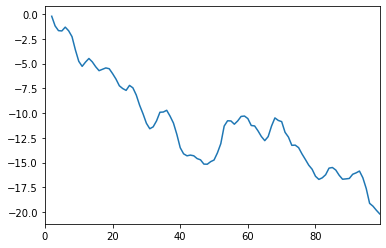

In [59]:
# строим график на основе 3-дневного скользящего среднего
means[0:100].plot();

# Случайная выборка

In [60]:
# создаем датафрейм, состоящий из 50 строк и 4 столбцов
# случайных чисел
np.random.seed(123456)
df = pd.DataFrame(np.random.randn(50, 4))
df[:5]

,0,1,2,3
0,0.469112,-0.282863,-1.509059,-1.135632
1,1.212112,-0.173215,0.119209,-1.044236
2,-0.861849,-2.104569,-0.494929,1.071804
3,0.721555,-0.706771,-1.039575,0.271860
4,-0.424972,0.567020,0.276232,-1.087401


In [61]:
# отбираем три случайные строки
df.sample(n=3)

,0,1,2,3
15,-0.076467,-1.187678,1.130127,-1.436737
28,-2.182937,0.380396,0.084844,0.432390
48,-0.693921,1.613616,0.464000,0.227371


In [62]:
# отбираем 10% строк
df.sample(frac=0.1)

,0,1,2,3
37,1.126203,-0.977349,1.474071,-0.064034
10,-1.294524,0.413738,0.276662,-0.472035
4,-0.424972,0.567020,0.276232,-1.087401
14,0.410835,0.813850,0.132003,-0.827317
48,-0.693921,1.613616,0.464000,0.227371


In [63]:
# случайный отбор 10% наблюдений с возвращением
df.sample(frac=0.1, replace=True)

,0,1,2,3
27,-1.236269,0.896171,-0.487602,-0.082240
9,0.357021,-0.674600,-1.776904,-0.968914
27,-1.236269,0.896171,-0.487602,-0.082240
15,-0.076467,-1.187678,1.130127,-1.436737
9,0.357021,-0.674600,-1.776904,-0.968914
